## SimpleRNN
#### Forecasting points of a noisy sin wave using a simple recurrent neural network

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Creating and reshaping the data

In [ ]:
X = np.sin(0.1*np.arange(200)) + 0.01*np.random.randn(200)

In [ ]:
D = 10
x = []
y = []
for i in range(len(X)-D):
  x.append(X[i:i+D])
  y.append(X[i+D])

In [86]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(190, 10)
(190,)


In [ ]:
x = x.reshape(-1,D,1)

In [ ]:
N = len(x)
x_train = x[:-N//2]
x_test = x[-N//2:]
y_train = y[:-N//2]
y_test = y[-N//2:]


In [89]:
print(x_train.shape)

(95, 10, 1)


#### Building and training the model

In [ ]:
i = tf.keras.layers.Input(shape=(D,1))
x = tf.keras.layers.SimpleRNN(5, activation = None)(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = "mse")

In [92]:
r = model.fit(x_train, y_train, epochs = 80, validation_data = (x_test, y_test), batch_size = 32)

Epoch 1/80
3/3 [==============================] - 0s 53ms/step - loss: 4.8988 - val_loss: 0.3707
Epoch 2/80
3/3 [==============================] - 0s 13ms/step - loss: 0.3725 - val_loss: 0.2233
Epoch 3/80
3/3 [==============================] - 0s 13ms/step - loss: 0.2416 - val_loss: 0.1591
Epoch 4/80
3/3 [==============================] - 0s 14ms/step - loss: 0.1461 - val_loss: 0.1924
Epoch 5/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1513 - val_loss: 0.1891
Epoch 6/80
3/3 [==============================] - 0s 15ms/step - loss: 0.1184 - val_loss: 0.1028
Epoch 7/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0497 - val_loss: 0.0141
Epoch 8/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0059 - val_loss: 0.0143
Epoch 9/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0264 - val_loss: 0.0328
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0288 - val_loss: 0.0156
Epoch 11/80
3/3 [============

#### Evaluating the model

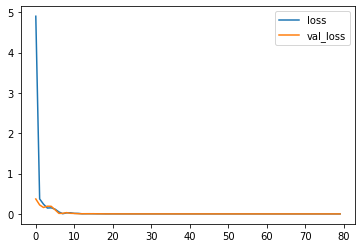

In [93]:
plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

In [ ]:
predictions = []
last_x = x_test[0]
for i in range(len(y_test)):
  p = model.predict(last_x.reshape(1, D, 1))[0,0]
  predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p


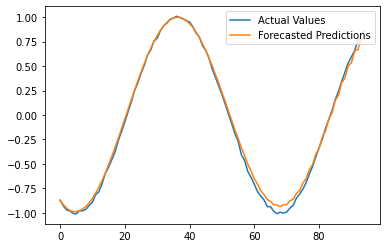

In [95]:
plt.plot(y_test, label = "Actual Values")
plt.plot(predictions, label = "Forecasted Predictions")
plt.legend()

The SimpleRNN is performing well in forecasting values!